In [18]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

TRAIN_DATA = '../input/train_folds.csv'

In [2]:
train = pd.read_csv(TRAIN_DATA)
#SHIFT+TAB to see function definition

<BarContainer object of 11 artists>

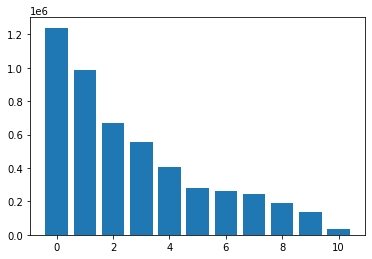

In [3]:
plt.bar(sorted(train.open_channels.unique()), train.open_channels.value_counts().values)

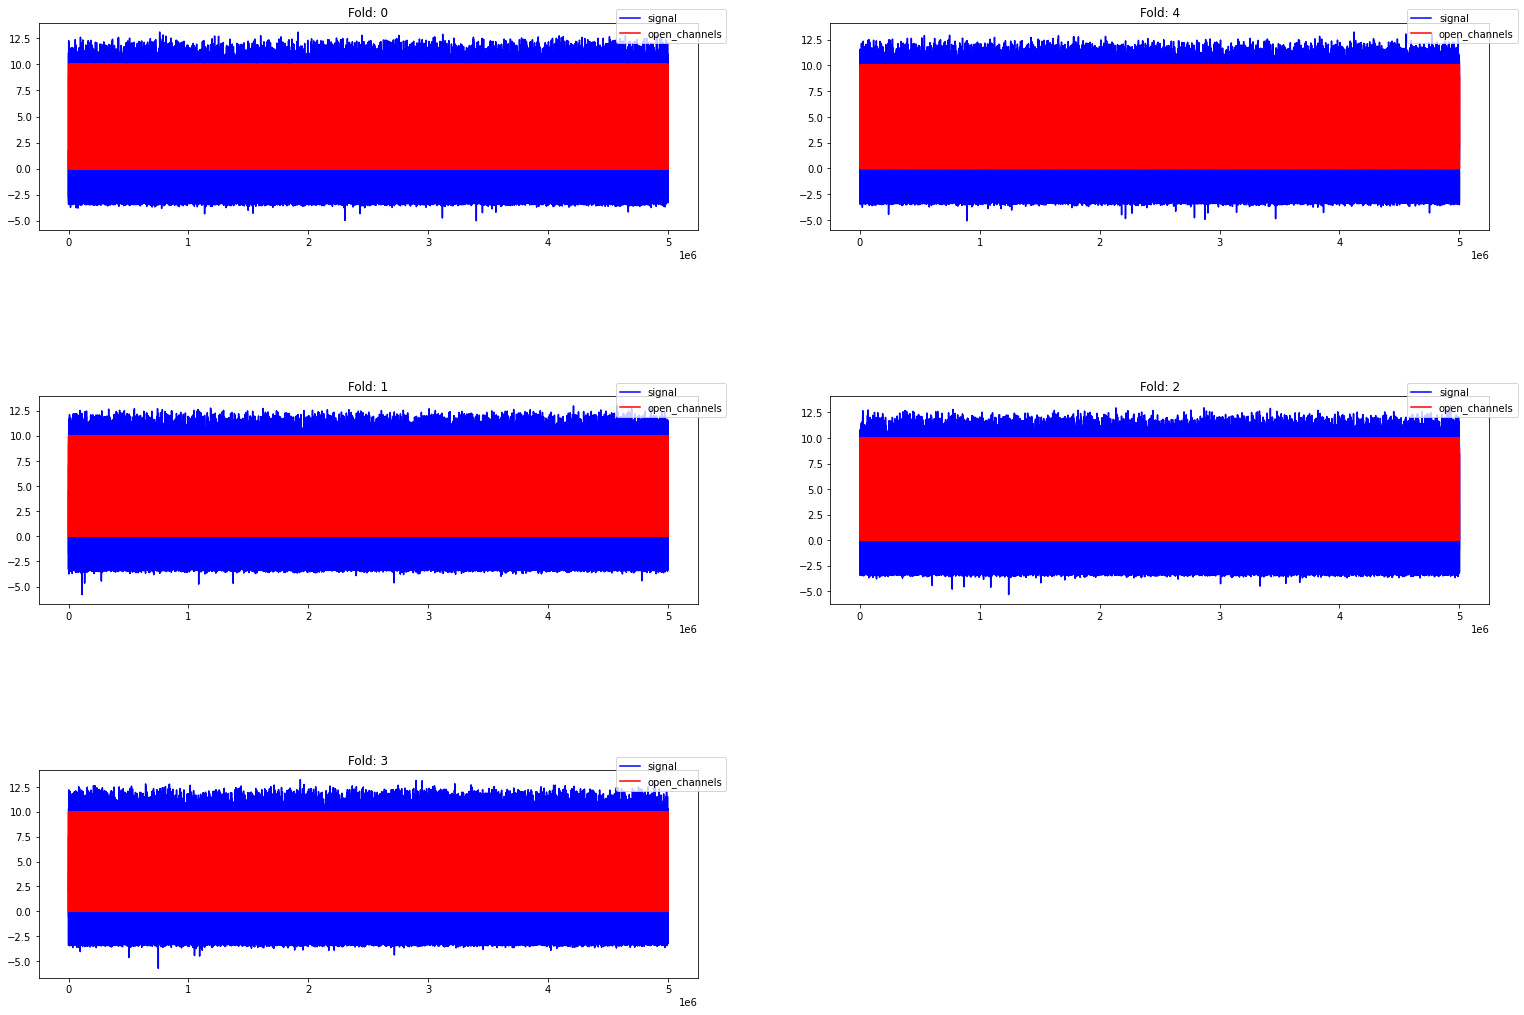

In [4]:
plt.figure(figsize=(26, 22))
plt.subplots_adjust(top=1.2, hspace = 0.8)
for i, b in enumerate(train['kfold'].unique()):
    plt.subplot(5, 2, i + 1)
    plt.plot(train.loc[train['kfold'] == b, ['signal']], color='b')
    plt.title(f'Fold: {b}')
    plt.plot(train.loc[train['kfold'] == b, ['open_channels']], color='r')
    plt.legend(['signal', 'open_channels'], loc=(0.875, 0.9))
    plt.grid(False)

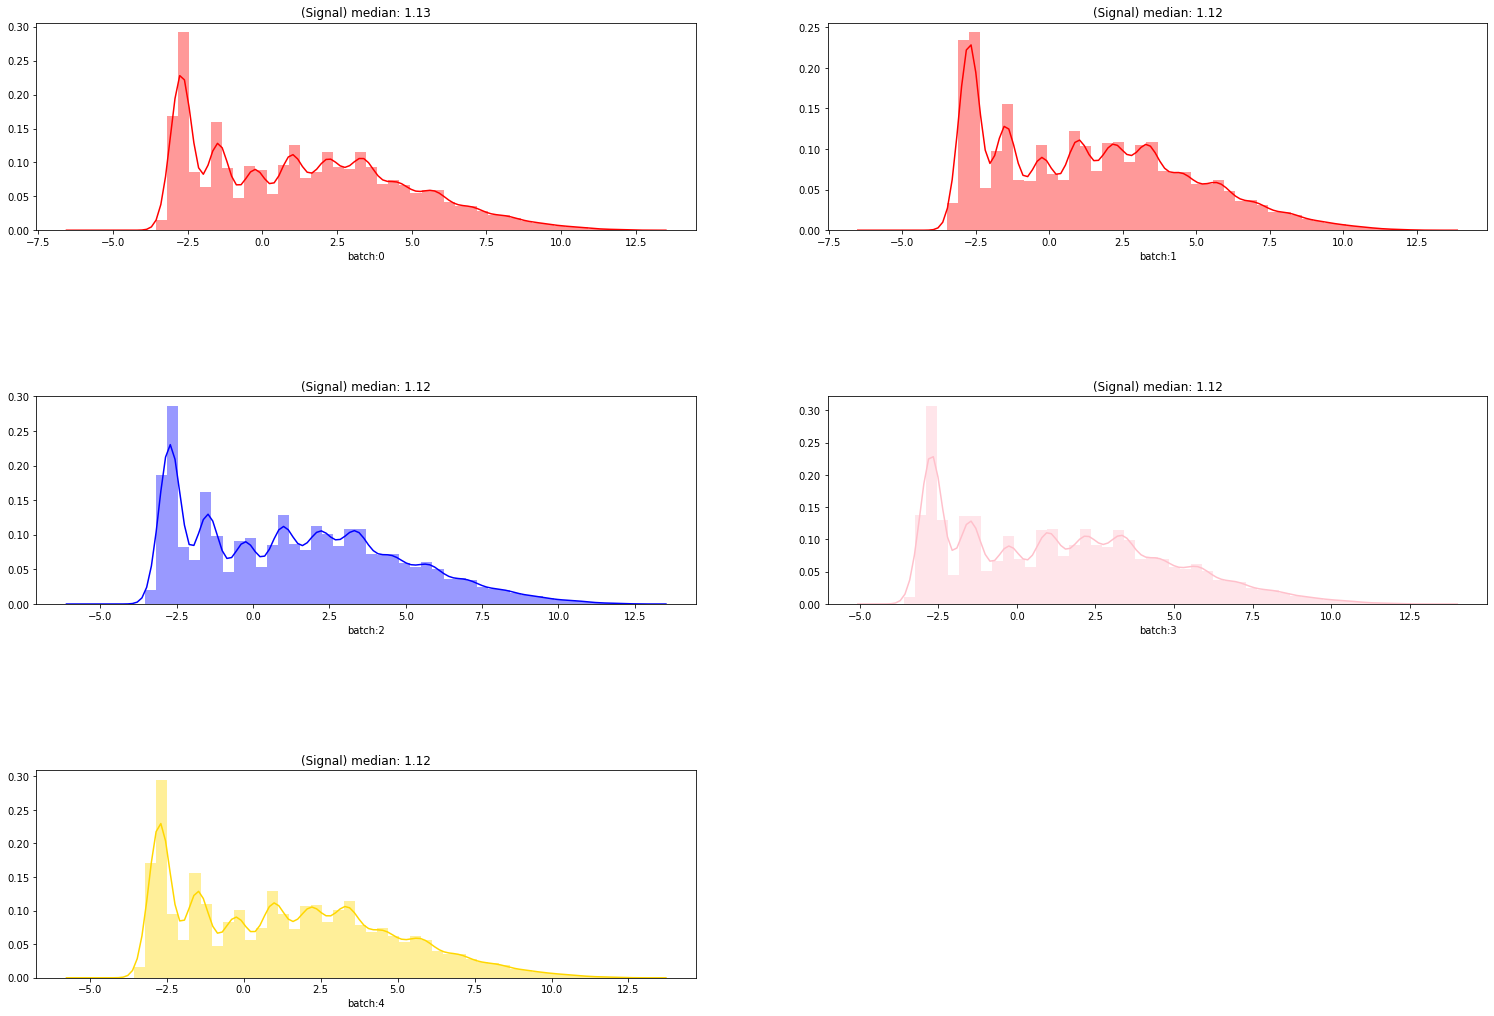

In [5]:

df = pd.DataFrame()
ROW_PER_BATCH = 500_000
plt.figure(figsize=(26, 22))
plt.subplots_adjust(top=1.2, hspace = 0.8)
colors = ['red','red','blue','pink','gold','brown','blue','pink','brown','gold']
for i in train['kfold'].unique():
    df[ f'batch:{i}' ] = train.iloc[i*ROW_PER_BATCH : (i+1)*ROW_PER_BATCH].reset_index().signal 
    plt.subplot(5, 2, i + 1)
    
    sns.distplot(df[f'batch:{i}'], color= colors[i]).set_title(f"(Signal) median: {df[f'batch:{i}'].median():.2f}")

In [48]:
train_df = pd.read_csv('../input/train_folds.csv')
test_df = pd.read_csv('../input/test.csv')

In [30]:
for fold in train_df.kfold.unique():
    train_df.loc[train_df['kfold']==fold, 'fold_mean'] = train_df.loc[train_df['kfold']==fold, 'signal'].mean()

In [31]:
train_df.loc[train_df['kfold']==fold, 'signal'].head()

5    -0.5669
7     7.6645
11    3.1755
15   -1.8230
16   -1.6957
Name: signal, dtype: float64

In [32]:
train_df.head()

,time,signal,open_channels,kfold,fold_mean
0,17.9636,-2.6454,0,0,1.384880
1,149.0120,-1.1546,1,4,1.384099
2,455.9371,4.5592,7,1,1.384445
3,357.4552,1.2930,2,1,1.384445
4,304.2334,-1.7998,0,2,1.391351


In [33]:
train_df.signal.describe()

count    5.000000e+06
mean     1.386246e+00
std      3.336219e+00
min     -5.796500e+00
25%     -1.594800e+00
50%      1.124000e+00
75%      3.690100e+00
max      1.324400e+01
Name: signal, dtype: float64

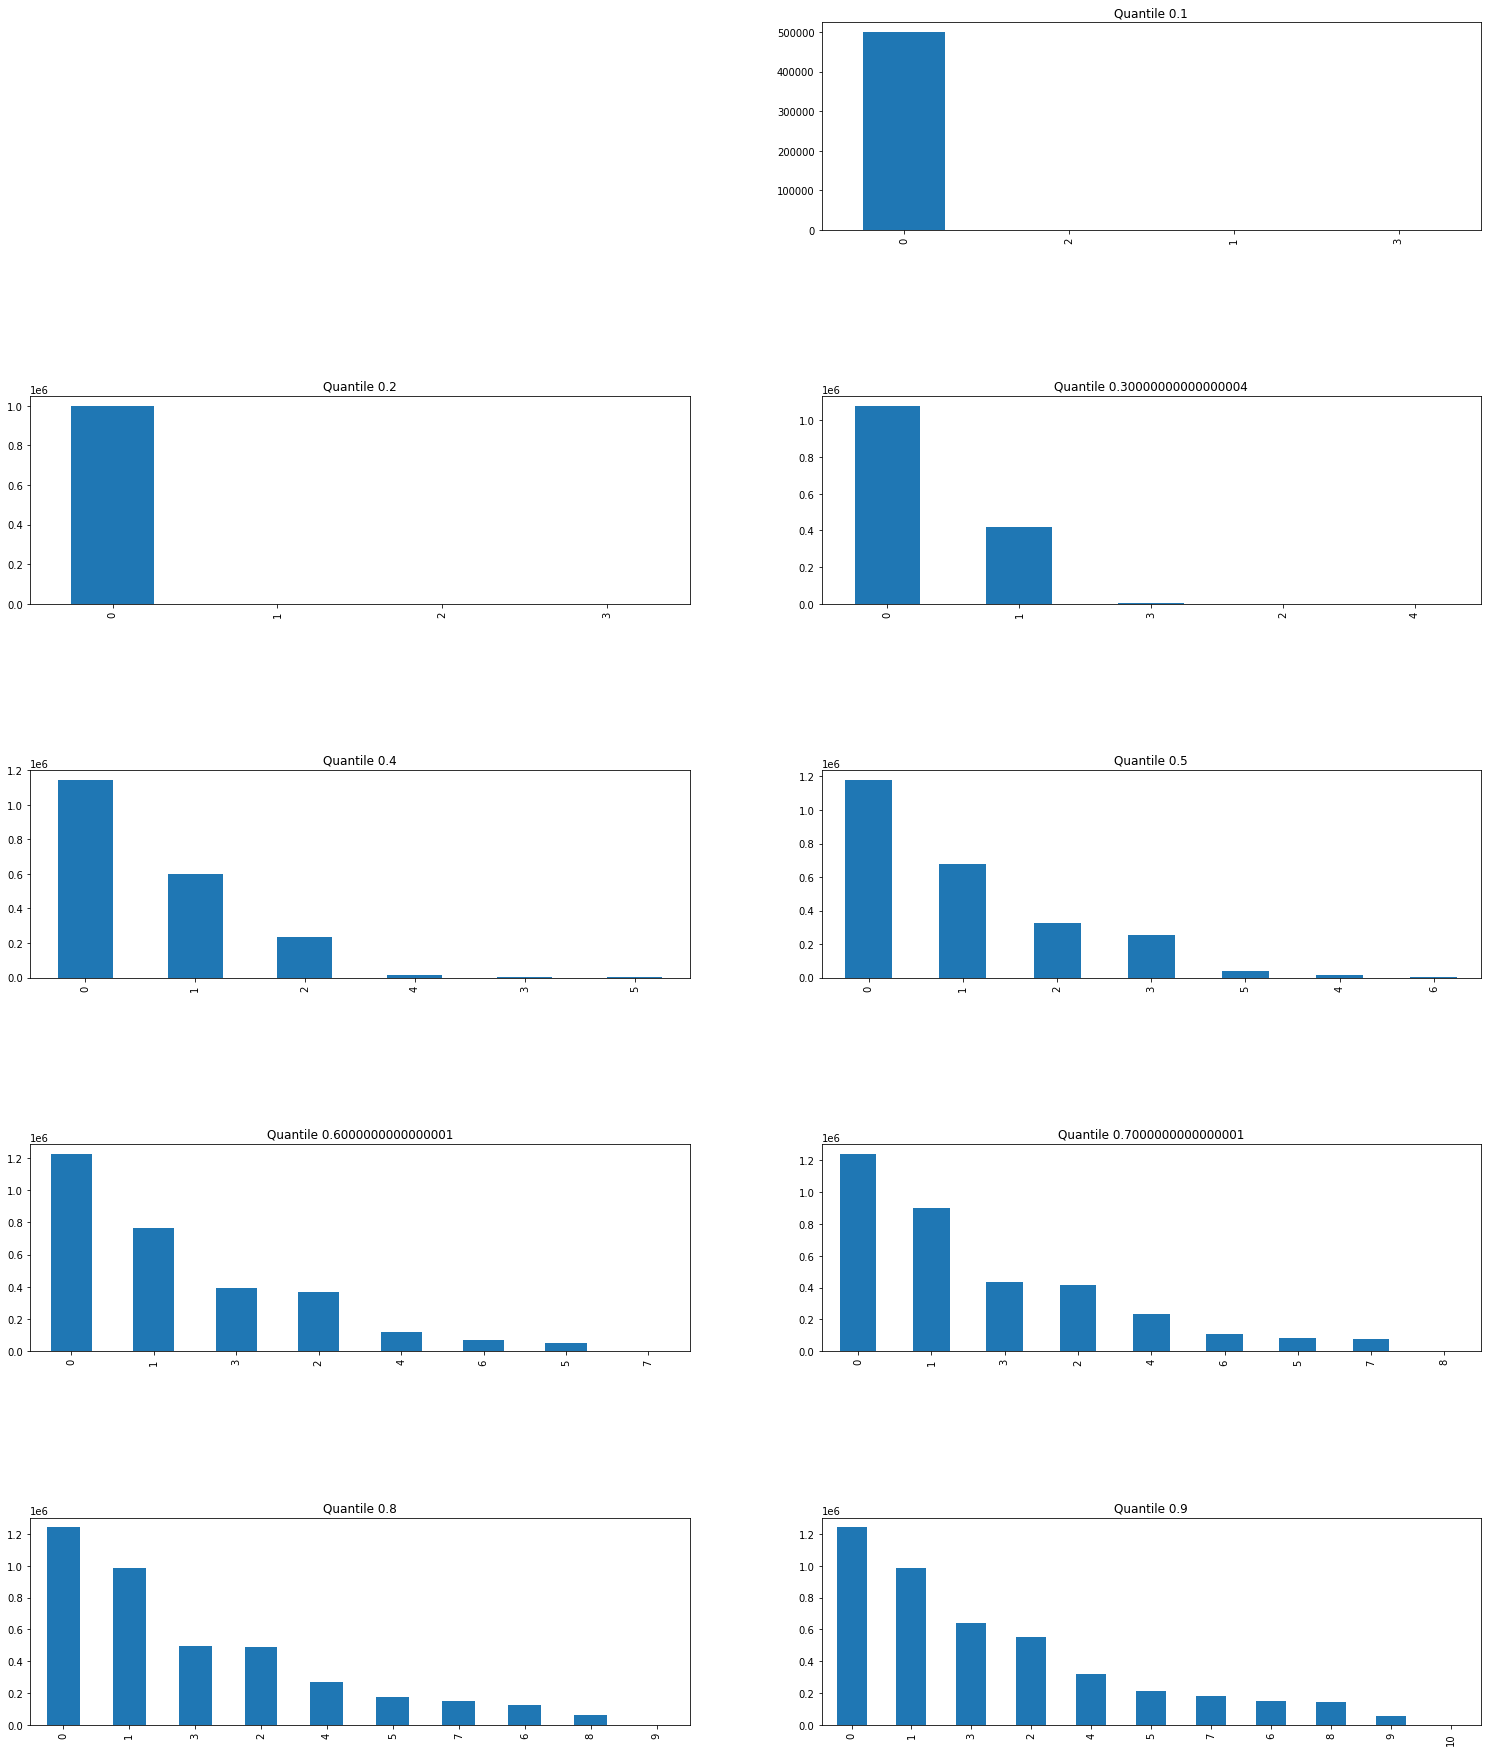

In [47]:
plt.figure(figsize=(26, 22))
plt.subplots_adjust(top=1.2, hspace = 0.8)

for i in [i*0.1 for i in range(1,10)]:
    plt.subplot(5,2,i*10+1).set_title(f'Quantile {i}')
    
    train_df[train_df['signal'] < np.quantile(train_df.signal, i)].open_channels.value_counts().plot.bar()
#     print(train_df[train_df['signal'] < np.quantile(train_df.signal, i)].open_channels.value_counts())

In [114]:
for i in [i*0.1 for i in range(1,10)]:
    print(f'Signals in {round(i,2)}-th signal quantile:')
    print(test_df[test_df['signal'] < np.quantile(test_df.signal, i)].signal.size)

Signals in 0.1-th signal quantile:
199943
Signals in 0.2-th signal quantile:
399896
Signals in 0.3-th signal quantile:
599986
Signals in 0.4-th signal quantile:
799996
Signals in 0.5-th signal quantile:
999999
Signals in 0.6-th signal quantile:
1200001
Signals in 0.7-th signal quantile:
1399996
Signals in 0.8-th signal quantile:
1600000
Signals in 0.9-th signal quantile:
1799988
